# Empirical moments

Startup run in 3.785156011581421 secs.


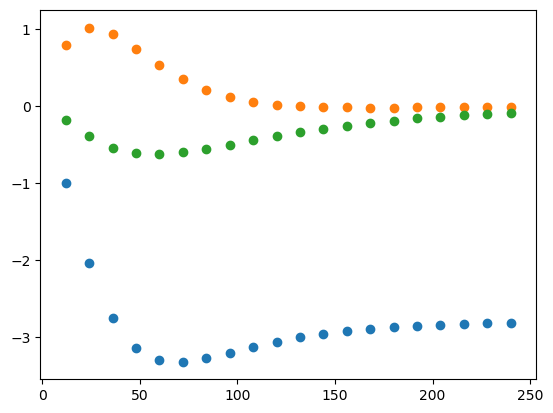

false

In [1]:
using NBInclude, DataFrames, XLSX

@nbinclude("startup.ipynb")

dir_gra = joinpath(pwd(),"../graphs/empirical")
dir_tab = joinpath(pwd(),"../empiricalmoments/results")
_tosave = false

In [2]:
mydata = let
    rawmat = XLSX.readxlsx(joinpath(dir_tab,"HandIRF_RFIV_persistent_no_covid_high_regulation.xlsx"))["Sheet1"][3:end,1:9]
    mymat=Matrix{Float64}(rawmat[:,vcat(1,9,4,6)])
    out_high = DataFrame(mymat, [:t, :m_high, :er_high, :pr_high])
    out_high[:,:t] .+= 1
    out_high.ur_high = - out_high.er_high
    
    rawmat = XLSX.readxlsx(joinpath(dir_tab,"HandIRF_RFIV_persistent_no_covid_low_regulation.xlsx"))["Sheet1"][3:end,1:9]
    mymat=Matrix{Float64}(rawmat[:,vcat(9,4,6)])    
    out_low = DataFrame(mymat, [:m_low, :er_low, :pr_low])
    out_low.ur_low = - out_low.er_low
    
    rawmat = XLSX.readxlsx(joinpath(dir_tab,"HandIRF_RFIV_persistent_no_covid.xlsx"))["Sheet1"][3:end,1:9]
    mymat=Matrix{Float64}(rawmat[:,vcat(9,4,6)])    
    out_all = DataFrame(mymat, [:m_all, :er_all, :pr_all])
    out_all.ur_all = - out_all.er_all
    
    hcat(out_high, out_low, out_all)
end;

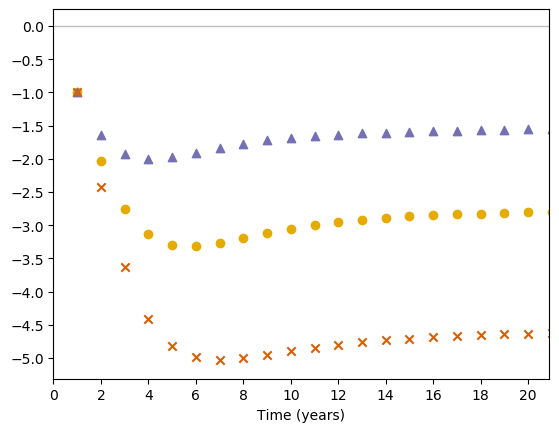

()

In [3]:
### employment
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = mydata.t
scatter(xmom, mydata.m_all, c=myorange, label="all")
scatter(xmom, mydata.m_high, marker=:^, c=myblue, label="high")
scatter(xmom, mydata.m_low, marker=:x, c=myred, label="low")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
#legend(loc=1)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.5) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"employment.png")) : ()

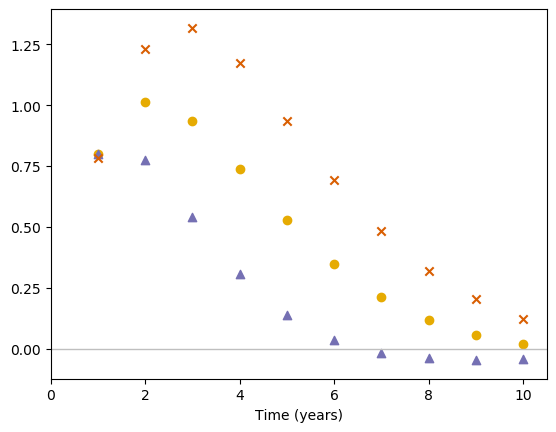

()

In [4]:
### unemployment rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = mydata.t
scatter(xmom, mydata.ur_all, c=myorange, label="all")
scatter(xmom, mydata.ur_high, marker=:^, c=myblue, label="high")
scatter(xmom, mydata.ur_low, marker=:x, c=myred, label="low")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,10.5))
xlabel("Time (years)")
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"urate.png")) : ()

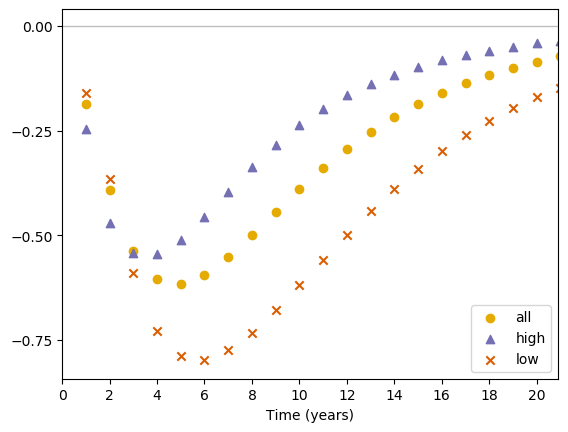

()

In [5]:
### participation rate
figure() 
plot([0,24], fill(0,2), c=mygrey, lw=1)
xmom = mydata.t
scatter(xmom, mydata.pr_all, c=myorange, label="all")
scatter(xmom, mydata.pr_high, marker=:^, c=myblue, label="high")
scatter(xmom, mydata.pr_low, marker=:x, c=myred, label="low")
xlabel("Time (years)")
ax = gca()
ax.set(xlim=(0,20.9))
xlabel("Time (years)")
legend(loc=4)
Mx = matplotlib.ticker.MultipleLocator(2) # Define interval of major ticks
ax.xaxis.set_major_locator(Mx) # Set interval of major ticks
My = matplotlib.ticker.MultipleLocator(0.25) # Define interval of major ticks
ax.yaxis.set_major_locator(My) # Set interval of major ticks
_tosave ? savefig(joinpath(dir_gra,"prate.png")) : ()